# 用于跑所有的bseline和C3L

In [1]:
# load packages
import pandas as pd
import seaborn as sns
# import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import math
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import utils.prepareDataCSV as prepare
import utils.baselineModels as baseline
import utils.myModel as my
import utils.train as train
import utils.plot as p

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
%matplotlib inline

/cloud/myenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
T = 100
x_features = 40
# k=-20至-24分别对应预测范围30，25，20，15，10
k = -20
batch_size = 64
num_classes = 3

# 使用40个特征Linear，MLP，CNN，LSTM，C3L的比较 

# LR

In [4]:
train7path = '../../data/processed/stock3/final_train7_part3.csv'
test7path = '../../data/processed/stock3/final_test7_part3.csv'
test8path = '../../data/processed/stock3/final_test8_part3.csv'
test9path = '../../data/processed/stock3/final_test9_part3.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-24,num_classes=num_classes,T=T,batch_size=batch_size, num_features=40)

In [5]:
model = baseline.LinearRegression(in_features=T*x_features, class_num=3)
model.to(device)

LinearRegression(
  (embedding_net): Linear(in_features=4000, out_features=3, bias=True)
)

In [6]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegression                         --                        --
├─Linear: 1-1                            [64, 3]                   12,003
Total params: 12,003
Trainable params: 12,003
Non-trainable params: 0
Total mult-adds (M): 0.77
Input size (MB): 1.02
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 1.07

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_rightOrder/stock3_LR_40_10')

  2%|▏         | 1/50 [00:01<01:24,  1.73s/it]

model saved
Epoch 1/50, Train Loss: 0.9175,           Validation Loss: 0.8372, Duration: 0:00:01.725797, Best Val Epoch: 0


  4%|▍         | 2/50 [00:03<01:23,  1.75s/it]

model saved
Epoch 2/50, Train Loss: 0.9112,           Validation Loss: 0.8371, Duration: 0:00:01.762766, Best Val Epoch: 1


  6%|▌         | 3/50 [00:05<01:22,  1.76s/it]

model saved
Epoch 3/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.769526, Best Val Epoch: 2


  8%|▊         | 4/50 [00:07<01:22,  1.80s/it]

model saved
Epoch 4/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.870803, Best Val Epoch: 3


 10%|█         | 5/50 [00:08<01:16,  1.70s/it]

model saved
Epoch 5/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.525300, Best Val Epoch: 4


 12%|█▏        | 6/50 [00:10<01:13,  1.67s/it]

model saved
Epoch 6/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.605813, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:11<01:10,  1.64s/it]

model saved
Epoch 7/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.586813, Best Val Epoch: 6


 16%|█▌        | 8/50 [00:13<01:08,  1.62s/it]

Epoch 8/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.570048, Best Val Epoch: 6


 18%|█▊        | 9/50 [00:14<01:05,  1.59s/it]

Epoch 9/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.530982, Best Val Epoch: 6


 20%|██        | 10/50 [00:16<01:03,  1.59s/it]

Epoch 10/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.572739, Best Val Epoch: 6


 22%|██▏       | 11/50 [00:18<01:01,  1.59s/it]

model saved
Epoch 11/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.586889, Best Val Epoch: 10


 24%|██▍       | 12/50 [00:19<01:01,  1.61s/it]

Epoch 12/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.670420, Best Val Epoch: 10


 26%|██▌       | 13/50 [00:21<00:59,  1.60s/it]

Epoch 13/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.573634, Best Val Epoch: 10


 28%|██▊       | 14/50 [00:22<00:57,  1.59s/it]

Epoch 14/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.572317, Best Val Epoch: 10


 30%|███       | 15/50 [00:24<00:55,  1.58s/it]

Epoch 15/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.542496, Best Val Epoch: 10


 32%|███▏      | 16/50 [00:26<00:53,  1.58s/it]

Epoch 16/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.587343, Best Val Epoch: 10


 34%|███▍      | 17/50 [00:27<00:51,  1.57s/it]

Epoch 17/50, Train Loss: 0.9108,           Validation Loss: 0.8371, Duration: 0:00:01.550182, Best Val Epoch: 10


 36%|███▌      | 18/50 [00:29<00:49,  1.56s/it]

Epoch 18/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.534814, Best Val Epoch: 10


 38%|███▊      | 19/50 [00:30<00:48,  1.56s/it]

Epoch 19/50, Train Loss: 0.9113,           Validation Loss: 0.8371, Duration: 0:00:01.547680, Best Val Epoch: 10


 40%|████      | 20/50 [00:32<00:47,  1.58s/it]

Epoch 20/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.645977, Best Val Epoch: 10


 42%|████▏     | 21/50 [00:34<00:47,  1.63s/it]

Epoch 21/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.719013, Best Val Epoch: 10


 44%|████▍     | 22/50 [00:35<00:45,  1.63s/it]

Epoch 22/50, Train Loss: 0.9113,           Validation Loss: 0.8371, Duration: 0:00:01.649025, Best Val Epoch: 10


 46%|████▌     | 23/50 [00:37<00:44,  1.64s/it]

Epoch 23/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.652841, Best Val Epoch: 10


 48%|████▊     | 24/50 [00:38<00:41,  1.61s/it]

Epoch 24/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.546020, Best Val Epoch: 10


 50%|█████     | 25/50 [00:40<00:40,  1.63s/it]

Epoch 25/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.677133, Best Val Epoch: 10


 52%|█████▏    | 26/50 [00:42<00:38,  1.60s/it]

Epoch 26/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.514628, Best Val Epoch: 10


 54%|█████▍    | 27/50 [00:43<00:36,  1.58s/it]

Epoch 27/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.526911, Best Val Epoch: 10


 56%|█████▌    | 28/50 [00:45<00:34,  1.56s/it]

Epoch 28/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.537633, Best Val Epoch: 10


 58%|█████▊    | 29/50 [00:46<00:33,  1.59s/it]

Epoch 29/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.640327, Best Val Epoch: 10


 60%|██████    | 30/50 [00:48<00:31,  1.59s/it]

Epoch 30/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.584655, Best Val Epoch: 10


 62%|██████▏   | 31/50 [00:50<00:30,  1.61s/it]

Epoch 31/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.661693, Best Val Epoch: 10


 64%|██████▍   | 32/50 [00:51<00:28,  1.60s/it]

Epoch 32/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.578343, Best Val Epoch: 10


 66%|██████▌   | 33/50 [00:53<00:27,  1.61s/it]

Epoch 33/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.622239, Best Val Epoch: 10


 68%|██████▊   | 34/50 [00:54<00:25,  1.58s/it]

Epoch 34/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.525087, Best Val Epoch: 10


 70%|███████   | 35/50 [00:56<00:24,  1.61s/it]

Epoch 35/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.662773, Best Val Epoch: 10


 72%|███████▏  | 36/50 [00:58<00:22,  1.59s/it]

Epoch 36/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.540985, Best Val Epoch: 10


 74%|███████▍  | 37/50 [00:59<00:20,  1.57s/it]

Epoch 37/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.518861, Best Val Epoch: 10


 76%|███████▌  | 38/50 [01:01<00:18,  1.57s/it]

Epoch 38/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.565286, Best Val Epoch: 10


 78%|███████▊  | 39/50 [01:02<00:17,  1.62s/it]

Epoch 39/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.749181, Best Val Epoch: 10


 80%|████████  | 40/50 [01:04<00:16,  1.61s/it]

Epoch 40/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.577191, Best Val Epoch: 10


 82%|████████▏ | 41/50 [01:05<00:14,  1.59s/it]

Epoch 41/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.558715, Best Val Epoch: 10


 84%|████████▍ | 42/50 [01:07<00:12,  1.57s/it]

Epoch 42/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.503552, Best Val Epoch: 10


 86%|████████▌ | 43/50 [01:09<00:11,  1.58s/it]

Epoch 43/50, Train Loss: 0.9111,           Validation Loss: 0.8371, Duration: 0:00:01.607424, Best Val Epoch: 10


 88%|████████▊ | 44/50 [01:10<00:09,  1.55s/it]

Epoch 44/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.470956, Best Val Epoch: 10


 90%|█████████ | 45/50 [01:12<00:07,  1.53s/it]

Epoch 45/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.479109, Best Val Epoch: 10


 92%|█████████▏| 46/50 [01:13<00:06,  1.50s/it]

Epoch 46/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.450477, Best Val Epoch: 10


 94%|█████████▍| 47/50 [01:14<00:04,  1.49s/it]

Epoch 47/50, Train Loss: 0.9109,           Validation Loss: 0.8371, Duration: 0:00:01.462142, Best Val Epoch: 10


 96%|█████████▌| 48/50 [01:16<00:03,  1.51s/it]

Epoch 48/50, Train Loss: 0.9110,           Validation Loss: 0.8371, Duration: 0:00:01.551712, Best Val Epoch: 10


 98%|█████████▊| 49/50 [01:17<00:01,  1.49s/it]

Epoch 49/50, Train Loss: 0.9112,           Validation Loss: 0.8371, Duration: 0:00:01.456400, Best Val Epoch: 10


100%|██████████| 50/50 [01:19<00:00,  1.59s/it]

Epoch 50/50, Train Loss: 0.9112,           Validation Loss: 0.8371, Duration: 0:00:01.465953, Best Val Epoch: 10


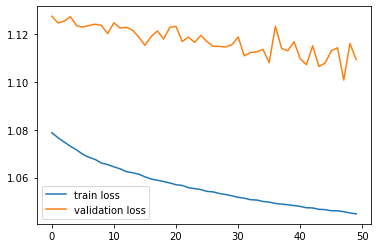

In [8]:
p.drawLossChange(train_losses, val_losses)

In [8]:
model = torch.load('./savedModels_rightOrder/stock3_LR_40_10')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      9946
           1     0.3669    1.0000    0.5368     10448
           2     0.0000    0.0000    0.0000      8084

    accuracy                         0.3669     28478
   macro avg     0.1223    0.3333    0.1789     28478
weighted avg     0.1346    0.3669    0.1969     28478



/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


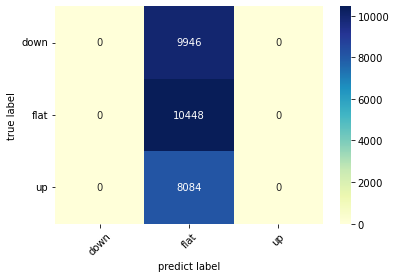

In [9]:
p.seeConfusionMatrix(all_targets,all_predictions) 

# MLP

In [10]:
T = 100
train7path = '../../data/processed/stock0/final_train7_part0.csv'
test7path = '../../data/processed/stock0/final_test7_part0.csv'
test8path = '../../data/processed/stock0/final_test8_part0.csv'
test9path = '../../data/processed/stock0/final_test9_part0.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-20,num_classes=num_classes,T=T,batch_size=batch_size)

In [11]:
model = baseline.MLP(in_features=T*x_features, class_num=3)
model.to(device)

MLP(
  (layer_1): Sequential(
    (0): Linear(in_features=4000, out_features=512, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer_2): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer_3): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer_4): Sequential(
    (0): Linear(in_features=1024, out_features=64, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer_5): Sequential(
    (0): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [12]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      --                        --
├─Sequential: 1-1                        [64, 512]                 --
│    └─Linear: 2-1                       [64, 512]                 2,048,512
│    └─ReLU: 2-2                         [64, 512]                 --
├─Sequential: 1-2                        [64, 1024]                --
│    └─Linear: 2-3                       [64, 1024]                525,312
│    └─ReLU: 2-4                         [64, 1024]                --
├─Sequential: 1-3                        [64, 1024]                --
│    └─Linear: 2-5                       [64, 1024]                1,049,600
│    └─ReLU: 2-6                         [64, 1024]                --
├─Sequential: 1-4                        [64, 64]                  --
│    └─Linear: 2-7                       [64, 64]                  65,600
│    └─ReLU: 2-8                         [64, 64]             

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_rightOrder/stock0_MLP_40_30')

  2%|▏         | 1/50 [00:02<02:11,  2.68s/it]

model saved
Epoch 1/50, Train Loss: 1.0147,           Validation Loss: 1.0099, Duration: 0:00:02.677824, Best Val Epoch: 0


  4%|▍         | 2/50 [00:05<02:03,  2.57s/it]

Epoch 2/50, Train Loss: 1.0104,           Validation Loss: 1.0111, Duration: 0:00:02.484939, Best Val Epoch: 0


  6%|▌         | 3/50 [00:07<02:00,  2.56s/it]

model saved
Epoch 3/50, Train Loss: 0.9984,           Validation Loss: 0.9805, Duration: 0:00:02.549613, Best Val Epoch: 2


  8%|▊         | 4/50 [00:10<01:57,  2.55s/it]

model saved
Epoch 4/50, Train Loss: 0.9786,           Validation Loss: 0.9692, Duration: 0:00:02.527314, Best Val Epoch: 3


 10%|█         | 5/50 [00:12<01:54,  2.54s/it]

model saved
Epoch 5/50, Train Loss: 0.9734,           Validation Loss: 0.9661, Duration: 0:00:02.540129, Best Val Epoch: 4


 12%|█▏        | 6/50 [00:15<01:53,  2.58s/it]

model saved
Epoch 6/50, Train Loss: 0.9677,           Validation Loss: 0.9642, Duration: 0:00:02.640542, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:18<01:52,  2.61s/it]

Epoch 7/50, Train Loss: 0.9654,           Validation Loss: 0.9674, Duration: 0:00:02.671131, Best Val Epoch: 5


 16%|█▌        | 8/50 [00:21<01:54,  2.73s/it]

Epoch 8/50, Train Loss: 0.9640,           Validation Loss: 0.9877, Duration: 0:00:03.003424, Best Val Epoch: 5


 18%|█▊        | 9/50 [00:24<01:56,  2.85s/it]

model saved
Epoch 9/50, Train Loss: 0.9622,           Validation Loss: 0.9616, Duration: 0:00:03.105298, Best Val Epoch: 8


 20%|██        | 10/50 [00:27<01:56,  2.92s/it]

Epoch 10/50, Train Loss: 0.9593,           Validation Loss: 0.9649, Duration: 0:00:03.066789, Best Val Epoch: 8


 22%|██▏       | 11/50 [00:30<01:54,  2.94s/it]

Epoch 11/50, Train Loss: 0.9587,           Validation Loss: 0.9765, Duration: 0:00:02.980499, Best Val Epoch: 8


 24%|██▍       | 12/50 [00:33<01:52,  2.97s/it]

Epoch 12/50, Train Loss: 0.9589,           Validation Loss: 1.0101, Duration: 0:00:03.050381, Best Val Epoch: 8


 26%|██▌       | 13/50 [00:36<01:50,  2.98s/it]

Epoch 13/50, Train Loss: 0.9569,           Validation Loss: 0.9825, Duration: 0:00:02.992675, Best Val Epoch: 8


 28%|██▊       | 14/50 [00:39<01:48,  3.00s/it]

Epoch 14/50, Train Loss: 0.9551,           Validation Loss: 0.9677, Duration: 0:00:03.064239, Best Val Epoch: 8


 30%|███       | 15/50 [00:42<01:44,  3.00s/it]

Epoch 15/50, Train Loss: 0.9560,           Validation Loss: 0.9636, Duration: 0:00:02.980940, Best Val Epoch: 8


 32%|███▏      | 16/50 [00:45<01:42,  3.01s/it]

Epoch 16/50, Train Loss: 0.9534,           Validation Loss: 0.9646, Duration: 0:00:03.050224, Best Val Epoch: 8


 34%|███▍      | 17/50 [00:48<01:39,  3.02s/it]

Epoch 17/50, Train Loss: 0.9552,           Validation Loss: 0.9640, Duration: 0:00:03.046650, Best Val Epoch: 8


 36%|███▌      | 18/50 [00:51<01:36,  3.01s/it]

Epoch 18/50, Train Loss: 0.9537,           Validation Loss: 0.9731, Duration: 0:00:02.979843, Best Val Epoch: 8


 38%|███▊      | 19/50 [00:54<01:38,  3.18s/it]

Epoch 19/50, Train Loss: 0.9511,           Validation Loss: 0.9681, Duration: 0:00:03.556514, Best Val Epoch: 8


 40%|████      | 20/50 [00:58<01:34,  3.16s/it]

Epoch 20/50, Train Loss: 0.9515,           Validation Loss: 0.9726, Duration: 0:00:03.113082, Best Val Epoch: 8


 42%|████▏     | 21/50 [01:01<01:30,  3.10s/it]

Epoch 21/50, Train Loss: 0.9520,           Validation Loss: 0.9654, Duration: 0:00:02.978192, Best Val Epoch: 8


 44%|████▍     | 22/50 [01:04<01:26,  3.08s/it]

Epoch 22/50, Train Loss: 0.9490,           Validation Loss: 0.9965, Duration: 0:00:03.032123, Best Val Epoch: 8


 46%|████▌     | 23/50 [01:07<01:22,  3.07s/it]

Epoch 23/50, Train Loss: 0.9490,           Validation Loss: 0.9658, Duration: 0:00:03.051932, Best Val Epoch: 8


 48%|████▊     | 24/50 [01:10<01:19,  3.05s/it]

Epoch 24/50, Train Loss: 0.9503,           Validation Loss: 0.9684, Duration: 0:00:02.980973, Best Val Epoch: 8


 50%|█████     | 25/50 [01:13<01:16,  3.05s/it]

Epoch 25/50, Train Loss: 0.9455,           Validation Loss: 0.9943, Duration: 0:00:03.053764, Best Val Epoch: 8


 52%|█████▏    | 26/50 [01:16<01:13,  3.05s/it]

Epoch 26/50, Train Loss: 0.9432,           Validation Loss: 0.9670, Duration: 0:00:03.058077, Best Val Epoch: 8


 54%|█████▍    | 27/50 [01:18<01:07,  2.93s/it]

Epoch 27/50, Train Loss: 0.9419,           Validation Loss: 0.9664, Duration: 0:00:02.630430, Best Val Epoch: 8


 56%|█████▌    | 28/50 [01:21<01:02,  2.83s/it]

Epoch 28/50, Train Loss: 0.9420,           Validation Loss: 0.9686, Duration: 0:00:02.600059, Best Val Epoch: 8


 58%|█████▊    | 29/50 [01:24<00:57,  2.75s/it]

Epoch 29/50, Train Loss: 0.9365,           Validation Loss: 0.9781, Duration: 0:00:02.556207, Best Val Epoch: 8


 60%|██████    | 30/50 [01:26<00:53,  2.67s/it]

Epoch 30/50, Train Loss: 0.9343,           Validation Loss: 0.9663, Duration: 0:00:02.502125, Best Val Epoch: 8


 62%|██████▏   | 31/50 [01:29<00:50,  2.64s/it]

Epoch 31/50, Train Loss: 0.9269,           Validation Loss: 0.9707, Duration: 0:00:02.552311, Best Val Epoch: 8


 64%|██████▍   | 32/50 [01:31<00:46,  2.61s/it]

Epoch 32/50, Train Loss: 0.9267,           Validation Loss: 0.9773, Duration: 0:00:02.538115, Best Val Epoch: 8


 66%|██████▌   | 33/50 [01:34<00:43,  2.57s/it]

Epoch 33/50, Train Loss: 0.9242,           Validation Loss: 0.9700, Duration: 0:00:02.475876, Best Val Epoch: 8


 68%|██████▊   | 34/50 [01:36<00:40,  2.56s/it]

Epoch 34/50, Train Loss: 0.9200,           Validation Loss: 0.9637, Duration: 0:00:02.546293, Best Val Epoch: 8


 70%|███████   | 35/50 [01:39<00:38,  2.56s/it]

Epoch 35/50, Train Loss: 0.9167,           Validation Loss: 0.9684, Duration: 0:00:02.550123, Best Val Epoch: 8


 72%|███████▏  | 36/50 [01:41<00:35,  2.54s/it]

Epoch 36/50, Train Loss: 0.9109,           Validation Loss: 0.9796, Duration: 0:00:02.481780, Best Val Epoch: 8


 74%|███████▍  | 37/50 [01:44<00:33,  2.56s/it]

Epoch 37/50, Train Loss: 0.9175,           Validation Loss: 0.9705, Duration: 0:00:02.611680, Best Val Epoch: 8


 76%|███████▌  | 38/50 [01:46<00:30,  2.56s/it]

Epoch 38/50, Train Loss: 0.9084,           Validation Loss: 0.9689, Duration: 0:00:02.563440, Best Val Epoch: 8


 78%|███████▊  | 39/50 [01:49<00:27,  2.54s/it]

Epoch 39/50, Train Loss: 0.9020,           Validation Loss: 0.9678, Duration: 0:00:02.503073, Best Val Epoch: 8


 80%|████████  | 40/50 [01:51<00:25,  2.55s/it]

Epoch 40/50, Train Loss: 0.9029,           Validation Loss: 0.9933, Duration: 0:00:02.579139, Best Val Epoch: 8


 82%|████████▏ | 41/50 [01:54<00:23,  2.56s/it]

Epoch 41/50, Train Loss: 0.8975,           Validation Loss: 0.9683, Duration: 0:00:02.563530, Best Val Epoch: 8


 84%|████████▍ | 42/50 [01:57<00:20,  2.54s/it]

Epoch 42/50, Train Loss: 0.8967,           Validation Loss: 0.9775, Duration: 0:00:02.487724, Best Val Epoch: 8


 86%|████████▌ | 43/50 [01:59<00:17,  2.56s/it]

Epoch 43/50, Train Loss: 0.9022,           Validation Loss: 0.9653, Duration: 0:00:02.598765, Best Val Epoch: 8


 88%|████████▊ | 44/50 [02:02<00:15,  2.54s/it]

Epoch 44/50, Train Loss: 0.8971,           Validation Loss: 0.9652, Duration: 0:00:02.494449, Best Val Epoch: 8


 90%|█████████ | 45/50 [02:04<00:12,  2.55s/it]

Epoch 45/50, Train Loss: 0.8954,           Validation Loss: 0.9665, Duration: 0:00:02.563614, Best Val Epoch: 8


 92%|█████████▏| 46/50 [02:07<00:10,  2.53s/it]

Epoch 46/50, Train Loss: 0.8878,           Validation Loss: 0.9715, Duration: 0:00:02.506536, Best Val Epoch: 8


 94%|█████████▍| 47/50 [02:09<00:07,  2.55s/it]

Epoch 47/50, Train Loss: 0.8838,           Validation Loss: 0.9682, Duration: 0:00:02.586530, Best Val Epoch: 8


 96%|█████████▌| 48/50 [02:12<00:05,  2.55s/it]

Epoch 48/50, Train Loss: 0.8883,           Validation Loss: 0.9723, Duration: 0:00:02.536012, Best Val Epoch: 8


 98%|█████████▊| 49/50 [02:14<00:02,  2.54s/it]

Epoch 49/50, Train Loss: 0.8856,           Validation Loss: 0.9748, Duration: 0:00:02.520472, Best Val Epoch: 8


100%|██████████| 50/50 [02:17<00:00,  2.75s/it]

model saved
Epoch 50/50, Train Loss: 0.8822,           Validation Loss: 0.9611, Duration: 0:00:02.651226, Best Val Epoch: 49


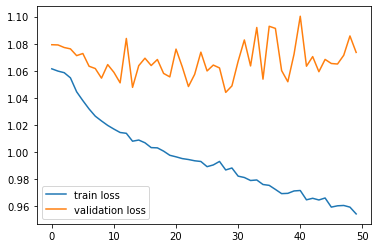

In [25]:
p.drawLossChange(train_losses, val_losses)

In [13]:
model = torch.load('./savedModels_rightOrder/stock0_MLP_40_30')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.5050    0.6682    0.5752     11891
           1     0.0000    0.0000    0.0000      6138
           2     0.4838    0.5901    0.5317     10449

    accuracy                         0.4955     28478
   macro avg     0.3296    0.4194    0.3690     28478
weighted avg     0.3884    0.4955    0.4353     28478



/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cloud/myenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


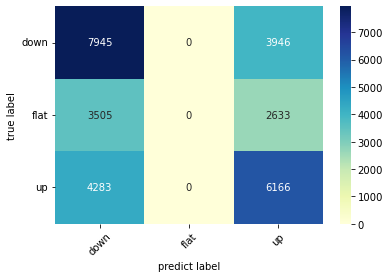

In [14]:
p.seeConfusionMatrix(all_targets,all_predictions)

# CNN

In [76]:
T = 100
train7path = '../../data/processed/stock4/final_train7_part4.csv'
test7path = '../../data/processed/stock4/final_test7_part4.csv'
test8path = '../../data/processed/stock4/final_test8_part4.csv'
test9path = '../../data/processed/stock4/final_test9_part4.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-24,num_classes=num_classes,T=T,batch_size=batch_size)

In [77]:
model = baseline.ConvNet(y_len=3)
model.to(device)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 10), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): Bat

In [46]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
ConvNet                                  --                        --
├─Sequential: 1-1                        [64, 32, 97, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
├─Sequential: 1-2                        [64, 32, 94, 10]          --
│    └─Conv2d: 2-7                       [64, 32, 97, 10]          2,080
│    └─Tanh: 2-8                         [64, 32, 97, 10]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 97, 10]          64
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          4,128
│    └

In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_rightOrder/stock4_CNN_40_10')

  2%|▏         | 1/50 [00:05<04:22,  5.36s/it]

model saved
Epoch 1/50, Train Loss: 0.9971,           Validation Loss: 0.9078, Duration: 0:00:05.360019, Best Val Epoch: 0


  4%|▍         | 2/50 [00:10<03:58,  4.97s/it]

Epoch 2/50, Train Loss: 0.9637,           Validation Loss: 0.9093, Duration: 0:00:04.697466, Best Val Epoch: 0


  6%|▌         | 3/50 [00:15<03:53,  4.97s/it]

Epoch 3/50, Train Loss: 0.9415,           Validation Loss: 0.9331, Duration: 0:00:04.959883, Best Val Epoch: 0


  8%|▊         | 4/50 [00:19<03:46,  4.93s/it]

Epoch 4/50, Train Loss: 0.9288,           Validation Loss: 0.9082, Duration: 0:00:04.880040, Best Val Epoch: 0


 10%|█         | 5/50 [00:24<03:42,  4.94s/it]

Epoch 5/50, Train Loss: 0.9227,           Validation Loss: 0.9082, Duration: 0:00:04.963050, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:29<03:36,  4.93s/it]

Epoch 6/50, Train Loss: 0.9094,           Validation Loss: 0.9216, Duration: 0:00:04.899318, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:34<03:32,  4.95s/it]

Epoch 7/50, Train Loss: 0.9013,           Validation Loss: 0.9129, Duration: 0:00:04.991379, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:39<03:25,  4.90s/it]

Epoch 8/50, Train Loss: 0.8956,           Validation Loss: 0.9356, Duration: 0:00:04.800306, Best Val Epoch: 0


 18%|█▊        | 9/50 [00:44<03:20,  4.88s/it]

Epoch 9/50, Train Loss: 0.8889,           Validation Loss: 0.9256, Duration: 0:00:04.840408, Best Val Epoch: 0


 20%|██        | 10/50 [00:49<03:16,  4.92s/it]

Epoch 10/50, Train Loss: 0.8820,           Validation Loss: 0.9270, Duration: 0:00:04.998211, Best Val Epoch: 0


 22%|██▏       | 11/50 [00:54<03:11,  4.90s/it]

Epoch 11/50, Train Loss: 0.8735,           Validation Loss: 0.9287, Duration: 0:00:04.868820, Best Val Epoch: 0


 24%|██▍       | 12/50 [00:59<03:08,  4.95s/it]

Epoch 12/50, Train Loss: 0.8645,           Validation Loss: 0.9201, Duration: 0:00:05.045440, Best Val Epoch: 0


 26%|██▌       | 13/50 [01:04<03:03,  4.95s/it]

model saved
Epoch 13/50, Train Loss: 0.8535,           Validation Loss: 0.9006, Duration: 0:00:04.955288, Best Val Epoch: 12


 28%|██▊       | 14/50 [01:09<02:58,  4.95s/it]

model saved
Epoch 14/50, Train Loss: 0.8433,           Validation Loss: 0.8968, Duration: 0:00:04.957309, Best Val Epoch: 13


 30%|███       | 15/50 [01:14<02:53,  4.95s/it]

Epoch 15/50, Train Loss: 0.8337,           Validation Loss: 0.9047, Duration: 0:00:04.930124, Best Val Epoch: 13


 32%|███▏      | 16/50 [01:19<02:49,  4.97s/it]

model saved
Epoch 16/50, Train Loss: 0.8254,           Validation Loss: 0.8959, Duration: 0:00:05.027594, Best Val Epoch: 15


 34%|███▍      | 17/50 [01:24<02:43,  4.95s/it]

model saved
Epoch 17/50, Train Loss: 0.8178,           Validation Loss: 0.8949, Duration: 0:00:04.900711, Best Val Epoch: 16


 36%|███▌      | 18/50 [01:29<02:39,  4.99s/it]

model saved
Epoch 18/50, Train Loss: 0.8108,           Validation Loss: 0.8902, Duration: 0:00:05.083995, Best Val Epoch: 17


 38%|███▊      | 19/50 [01:34<02:33,  4.96s/it]

Epoch 19/50, Train Loss: 0.8039,           Validation Loss: 0.8927, Duration: 0:00:04.902725, Best Val Epoch: 17


 40%|████      | 20/50 [01:39<02:29,  4.99s/it]

Epoch 20/50, Train Loss: 0.7983,           Validation Loss: 0.9021, Duration: 0:00:05.032384, Best Val Epoch: 17


 42%|████▏     | 21/50 [01:44<02:25,  5.03s/it]

model saved
Epoch 21/50, Train Loss: 0.7919,           Validation Loss: 0.8895, Duration: 0:00:05.147596, Best Val Epoch: 20


 44%|████▍     | 22/50 [01:49<02:24,  5.16s/it]

Epoch 22/50, Train Loss: 0.7862,           Validation Loss: 0.8975, Duration: 0:00:05.437092, Best Val Epoch: 20


 46%|████▌     | 23/50 [01:54<02:17,  5.11s/it]

Epoch 23/50, Train Loss: 0.7797,           Validation Loss: 0.8997, Duration: 0:00:05.003079, Best Val Epoch: 20


 48%|████▊     | 24/50 [01:59<02:11,  5.05s/it]

Epoch 24/50, Train Loss: 0.7753,           Validation Loss: 0.8968, Duration: 0:00:04.921998, Best Val Epoch: 20


 50%|█████     | 25/50 [02:04<02:05,  5.02s/it]

model saved
Epoch 25/50, Train Loss: 0.7706,           Validation Loss: 0.8888, Duration: 0:00:04.954727, Best Val Epoch: 24


 52%|█████▏    | 26/50 [02:09<02:00,  5.04s/it]

Epoch 26/50, Train Loss: 0.7651,           Validation Loss: 0.8953, Duration: 0:00:05.077661, Best Val Epoch: 24


 54%|█████▍    | 27/50 [02:14<01:55,  5.03s/it]

Epoch 27/50, Train Loss: 0.7614,           Validation Loss: 0.8894, Duration: 0:00:05.000517, Best Val Epoch: 24


 56%|█████▌    | 28/50 [02:19<01:49,  4.99s/it]

Epoch 28/50, Train Loss: 0.7568,           Validation Loss: 0.9215, Duration: 0:00:04.896374, Best Val Epoch: 24


 58%|█████▊    | 29/50 [02:24<01:44,  4.99s/it]

model saved
Epoch 29/50, Train Loss: 0.7530,           Validation Loss: 0.8840, Duration: 0:00:04.974522, Best Val Epoch: 28


 60%|██████    | 30/50 [02:29<01:40,  5.00s/it]

Epoch 30/50, Train Loss: 0.7484,           Validation Loss: 0.8961, Duration: 0:00:05.039459, Best Val Epoch: 28


 62%|██████▏   | 31/50 [02:34<01:35,  5.02s/it]

Epoch 31/50, Train Loss: 0.7442,           Validation Loss: 0.9304, Duration: 0:00:05.057741, Best Val Epoch: 28


 64%|██████▍   | 32/50 [02:39<01:30,  5.02s/it]

Epoch 32/50, Train Loss: 0.7414,           Validation Loss: 0.9056, Duration: 0:00:05.022948, Best Val Epoch: 28


 66%|██████▌   | 33/50 [02:44<01:25,  5.02s/it]

Epoch 33/50, Train Loss: 0.7376,           Validation Loss: 0.8970, Duration: 0:00:05.008403, Best Val Epoch: 28


 68%|██████▊   | 34/50 [02:49<01:20,  5.00s/it]

Epoch 34/50, Train Loss: 0.7337,           Validation Loss: 0.8914, Duration: 0:00:04.974242, Best Val Epoch: 28


 70%|███████   | 35/50 [02:54<01:14,  5.00s/it]

Epoch 35/50, Train Loss: 0.7313,           Validation Loss: 0.9007, Duration: 0:00:04.972509, Best Val Epoch: 28


 72%|███████▏  | 36/50 [02:59<01:10,  5.02s/it]

Epoch 36/50, Train Loss: 0.7270,           Validation Loss: 0.8984, Duration: 0:00:05.069469, Best Val Epoch: 28


 74%|███████▍  | 37/50 [03:04<01:04,  5.00s/it]

Epoch 37/50, Train Loss: 0.7249,           Validation Loss: 0.8868, Duration: 0:00:04.944683, Best Val Epoch: 28


 76%|███████▌  | 38/50 [03:09<00:59,  4.98s/it]

Epoch 38/50, Train Loss: 0.7208,           Validation Loss: 0.8978, Duration: 0:00:04.941837, Best Val Epoch: 28


 78%|███████▊  | 39/50 [03:14<00:54,  4.98s/it]

Epoch 39/50, Train Loss: 0.7192,           Validation Loss: 0.8915, Duration: 0:00:04.982802, Best Val Epoch: 28


 80%|████████  | 40/50 [03:19<00:50,  5.04s/it]

Epoch 40/50, Train Loss: 0.7165,           Validation Loss: 0.8880, Duration: 0:00:05.177372, Best Val Epoch: 28


 82%|████████▏ | 41/50 [03:24<00:45,  5.02s/it]

Epoch 41/50, Train Loss: 0.7140,           Validation Loss: 0.8896, Duration: 0:00:04.954467, Best Val Epoch: 28


 84%|████████▍ | 42/50 [03:29<00:40,  5.01s/it]

Epoch 42/50, Train Loss: 0.7120,           Validation Loss: 0.9103, Duration: 0:00:05.000134, Best Val Epoch: 28


 86%|████████▌ | 43/50 [03:34<00:34,  4.99s/it]

Epoch 43/50, Train Loss: 0.7084,           Validation Loss: 0.8936, Duration: 0:00:04.955802, Best Val Epoch: 28


 88%|████████▊ | 44/50 [03:39<00:30,  5.01s/it]

Epoch 44/50, Train Loss: 0.7078,           Validation Loss: 0.8933, Duration: 0:00:05.029740, Best Val Epoch: 28


 90%|█████████ | 45/50 [03:44<00:25,  5.01s/it]

Epoch 45/50, Train Loss: 0.7061,           Validation Loss: 0.9231, Duration: 0:00:05.016187, Best Val Epoch: 28


 92%|█████████▏| 46/50 [03:49<00:19,  4.99s/it]

Epoch 46/50, Train Loss: 0.7032,           Validation Loss: 0.8883, Duration: 0:00:04.958725, Best Val Epoch: 28


 94%|█████████▍| 47/50 [03:54<00:15,  5.09s/it]

Epoch 47/50, Train Loss: 0.7004,           Validation Loss: 0.8953, Duration: 0:00:05.301041, Best Val Epoch: 28


 96%|█████████▌| 48/50 [04:00<00:10,  5.12s/it]

Epoch 48/50, Train Loss: 0.6992,           Validation Loss: 0.8906, Duration: 0:00:05.210516, Best Val Epoch: 28


 98%|█████████▊| 49/50 [04:05<00:05,  5.12s/it]

Epoch 49/50, Train Loss: 0.6974,           Validation Loss: 0.9227, Duration: 0:00:05.122477, Best Val Epoch: 28


100%|██████████| 50/50 [04:10<00:00,  5.02s/it]

Epoch 50/50, Train Loss: 0.6956,           Validation Loss: 0.8947, Duration: 0:00:05.481116, Best Val Epoch: 28


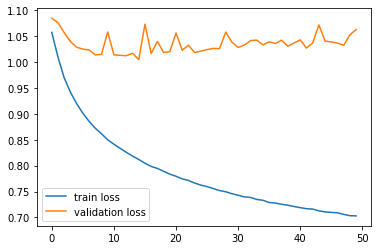

In [68]:
p.drawLossChange(train_losses, val_losses)

In [79]:
model = torch.load('./savedModels_rightOrder/stock4_CNN_40_10')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.2012    0.0499    0.0800      3466
           1     0.7831    0.9542    0.8602     21914
           2     0.3460    0.1027    0.1584      3106

    accuracy                         0.7514     28486
   macro avg     0.4434    0.3689    0.3662     28486
weighted avg     0.6646    0.7514    0.6888     28486



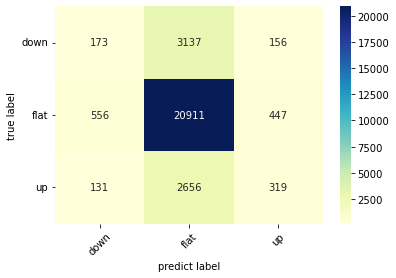

In [80]:
p.seeConfusionMatrix(all_targets,all_predictions)

# LSTM

In [99]:
T = 100
traint7path = '../../data/processed/stock3/final_train7_part3.csv'
test7path = '../../data/processed/stock3/final_test7_part3.csv'
test8path = '../../data/processed/stock3/final_test8_part3.csv'
test9path = '../../data/processed/stock3/final_test9_part3.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-24,num_classes=num_classes,T=T,batch_size=batch_size)

In [100]:
model = baseline.LstmNet(y_len=3, device=device, hidden_size=64)
model.to(device)

LstmNet(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 10), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32

In [32]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
LstmNet                                  --                        --
├─Sequential: 1-1                        [64, 32, 97, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
├─Sequential: 1-2                        [64, 32, 94, 10]          --
│    └─Conv2d: 2-7                       [64, 32, 97, 10]          2,080
│    └─Tanh: 2-8                         [64, 32, 97, 10]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 97, 10]          64
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          4,128
│    └

In [101]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_rightOrder/stock3_LSTM_40_10')

  2%|▏         | 1/50 [00:08<06:37,  8.10s/it]

model saved
Epoch 1/50, Train Loss: 0.9687,           Validation Loss: 0.9094, Duration: 0:00:08.104179, Best Val Epoch: 0


  4%|▍         | 2/50 [00:15<06:16,  7.84s/it]

model saved
Epoch 2/50, Train Loss: 0.9163,           Validation Loss: 0.9075, Duration: 0:00:07.650810, Best Val Epoch: 1


  6%|▌         | 3/50 [00:23<06:06,  7.80s/it]

model saved
Epoch 3/50, Train Loss: 0.9076,           Validation Loss: 0.8936, Duration: 0:00:07.745704, Best Val Epoch: 2


  8%|▊         | 4/50 [00:31<05:58,  7.79s/it]

model saved
Epoch 4/50, Train Loss: 0.8745,           Validation Loss: 0.8667, Duration: 0:00:07.787287, Best Val Epoch: 3


 10%|█         | 5/50 [00:39<05:58,  7.98s/it]

model saved
Epoch 5/50, Train Loss: 0.8571,           Validation Loss: 0.8586, Duration: 0:00:08.303326, Best Val Epoch: 4


 12%|█▏        | 6/50 [00:47<05:53,  8.04s/it]

model saved
Epoch 6/50, Train Loss: 0.8469,           Validation Loss: 0.8546, Duration: 0:00:08.158733, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:55<05:43,  7.98s/it]

model saved
Epoch 7/50, Train Loss: 0.8367,           Validation Loss: 0.8483, Duration: 0:00:07.848812, Best Val Epoch: 6


 16%|█▌        | 8/50 [01:03<05:32,  7.91s/it]

Epoch 8/50, Train Loss: 0.8255,           Validation Loss: 0.8493, Duration: 0:00:07.776307, Best Val Epoch: 6


 18%|█▊        | 9/50 [01:10<05:17,  7.73s/it]

model saved
Epoch 9/50, Train Loss: 0.8151,           Validation Loss: 0.8345, Duration: 0:00:07.338260, Best Val Epoch: 8


 20%|██        | 10/50 [01:18<05:07,  7.69s/it]

Epoch 10/50, Train Loss: 0.8077,           Validation Loss: 0.8371, Duration: 0:00:07.581774, Best Val Epoch: 8


 22%|██▏       | 11/50 [01:26<05:03,  7.78s/it]

Epoch 11/50, Train Loss: 0.8028,           Validation Loss: 0.8507, Duration: 0:00:07.975308, Best Val Epoch: 8


 24%|██▍       | 12/50 [01:33<04:52,  7.70s/it]

model saved
Epoch 12/50, Train Loss: 0.7971,           Validation Loss: 0.8319, Duration: 0:00:07.515714, Best Val Epoch: 11


 26%|██▌       | 13/50 [01:41<04:41,  7.60s/it]

model saved
Epoch 13/50, Train Loss: 0.7921,           Validation Loss: 0.8311, Duration: 0:00:07.384025, Best Val Epoch: 12


 28%|██▊       | 14/50 [01:49<04:44,  7.91s/it]

Epoch 14/50, Train Loss: 0.7879,           Validation Loss: 0.8334, Duration: 0:00:08.631786, Best Val Epoch: 12


 30%|███       | 15/50 [01:58<04:43,  8.11s/it]

Epoch 15/50, Train Loss: 0.7835,           Validation Loss: 0.8369, Duration: 0:00:08.555118, Best Val Epoch: 12


 32%|███▏      | 16/50 [02:05<04:29,  7.93s/it]

Epoch 16/50, Train Loss: 0.7798,           Validation Loss: 0.8343, Duration: 0:00:07.526737, Best Val Epoch: 12


 34%|███▍      | 17/50 [02:13<04:17,  7.79s/it]

Epoch 17/50, Train Loss: 0.7776,           Validation Loss: 0.8353, Duration: 0:00:07.455344, Best Val Epoch: 12


 36%|███▌      | 18/50 [02:20<04:06,  7.71s/it]

Epoch 18/50, Train Loss: 0.7732,           Validation Loss: 0.8402, Duration: 0:00:07.506978, Best Val Epoch: 12


 38%|███▊      | 19/50 [02:28<03:57,  7.65s/it]

Epoch 19/50, Train Loss: 0.7698,           Validation Loss: 0.8320, Duration: 0:00:07.517529, Best Val Epoch: 12


 40%|████      | 20/50 [02:36<03:50,  7.67s/it]

model saved
Epoch 20/50, Train Loss: 0.7665,           Validation Loss: 0.8283, Duration: 0:00:07.711009, Best Val Epoch: 19


 42%|████▏     | 21/50 [02:43<03:42,  7.67s/it]

Epoch 21/50, Train Loss: 0.7629,           Validation Loss: 0.8319, Duration: 0:00:07.666499, Best Val Epoch: 19


 44%|████▍     | 22/50 [02:51<03:39,  7.82s/it]

Epoch 22/50, Train Loss: 0.7612,           Validation Loss: 0.8338, Duration: 0:00:08.186325, Best Val Epoch: 19


 46%|████▌     | 23/50 [02:59<03:29,  7.76s/it]

Epoch 23/50, Train Loss: 0.7584,           Validation Loss: 0.8310, Duration: 0:00:07.610962, Best Val Epoch: 19


 48%|████▊     | 24/50 [03:07<03:20,  7.72s/it]

Epoch 24/50, Train Loss: 0.7555,           Validation Loss: 0.8566, Duration: 0:00:07.619666, Best Val Epoch: 19


 50%|█████     | 25/50 [03:15<03:14,  7.76s/it]

model saved
Epoch 25/50, Train Loss: 0.7529,           Validation Loss: 0.8272, Duration: 0:00:07.863210, Best Val Epoch: 24


 52%|█████▏    | 26/50 [03:22<03:06,  7.76s/it]

Epoch 26/50, Train Loss: 0.7504,           Validation Loss: 0.8313, Duration: 0:00:07.758015, Best Val Epoch: 24


 54%|█████▍    | 27/50 [03:30<02:59,  7.82s/it]

Epoch 27/50, Train Loss: 0.7493,           Validation Loss: 0.8382, Duration: 0:00:07.945902, Best Val Epoch: 24


 56%|█████▌    | 28/50 [03:38<02:52,  7.85s/it]

Epoch 28/50, Train Loss: 0.7454,           Validation Loss: 0.8413, Duration: 0:00:07.917445, Best Val Epoch: 24


 58%|█████▊    | 29/50 [03:46<02:44,  7.84s/it]

model saved
Epoch 29/50, Train Loss: 0.7435,           Validation Loss: 0.8270, Duration: 0:00:07.816371, Best Val Epoch: 28


 60%|██████    | 30/50 [03:54<02:35,  7.78s/it]

Epoch 30/50, Train Loss: 0.7422,           Validation Loss: 0.8324, Duration: 0:00:07.655617, Best Val Epoch: 28


 62%|██████▏   | 31/50 [04:01<02:27,  7.75s/it]

Epoch 31/50, Train Loss: 0.7406,           Validation Loss: 0.8451, Duration: 0:00:07.669189, Best Val Epoch: 28


 64%|██████▍   | 32/50 [04:09<02:19,  7.73s/it]

Epoch 32/50, Train Loss: 0.7385,           Validation Loss: 0.8309, Duration: 0:00:07.665793, Best Val Epoch: 28


 66%|██████▌   | 33/50 [04:17<02:11,  7.73s/it]

Epoch 33/50, Train Loss: 0.7363,           Validation Loss: 0.8314, Duration: 0:00:07.744337, Best Val Epoch: 28


 68%|██████▊   | 34/50 [04:24<02:03,  7.73s/it]

Epoch 34/50, Train Loss: 0.7351,           Validation Loss: 0.8410, Duration: 0:00:07.721648, Best Val Epoch: 28


 70%|███████   | 35/50 [04:32<01:56,  7.79s/it]

Epoch 35/50, Train Loss: 0.7337,           Validation Loss: 0.8474, Duration: 0:00:07.934627, Best Val Epoch: 28


 72%|███████▏  | 36/50 [04:40<01:48,  7.78s/it]

Epoch 36/50, Train Loss: 0.7319,           Validation Loss: 0.8324, Duration: 0:00:07.743563, Best Val Epoch: 28


 74%|███████▍  | 37/50 [04:48<01:41,  7.80s/it]

Epoch 37/50, Train Loss: 0.7297,           Validation Loss: 0.8354, Duration: 0:00:07.854698, Best Val Epoch: 28


 76%|███████▌  | 38/50 [04:56<01:33,  7.78s/it]

Epoch 38/50, Train Loss: 0.7281,           Validation Loss: 0.8311, Duration: 0:00:07.740401, Best Val Epoch: 28


 78%|███████▊  | 39/50 [05:03<01:25,  7.74s/it]

Epoch 39/50, Train Loss: 0.7268,           Validation Loss: 0.8300, Duration: 0:00:07.647382, Best Val Epoch: 28


 80%|████████  | 40/50 [05:11<01:18,  7.84s/it]

Epoch 40/50, Train Loss: 0.7244,           Validation Loss: 0.8409, Duration: 0:00:08.050133, Best Val Epoch: 28


 82%|████████▏ | 41/50 [05:19<01:10,  7.83s/it]

Epoch 41/50, Train Loss: 0.7241,           Validation Loss: 0.8505, Duration: 0:00:07.806985, Best Val Epoch: 28


 84%|████████▍ | 42/50 [05:27<01:02,  7.79s/it]

Epoch 42/50, Train Loss: 0.7233,           Validation Loss: 0.8330, Duration: 0:00:07.699529, Best Val Epoch: 28


 86%|████████▌ | 43/50 [05:35<00:54,  7.74s/it]

Epoch 43/50, Train Loss: 0.7224,           Validation Loss: 0.8426, Duration: 0:00:07.610628, Best Val Epoch: 28


 88%|████████▊ | 44/50 [05:42<00:46,  7.68s/it]

Epoch 44/50, Train Loss: 0.7204,           Validation Loss: 0.8297, Duration: 0:00:07.533073, Best Val Epoch: 28


 90%|█████████ | 45/50 [05:50<00:38,  7.70s/it]

Epoch 45/50, Train Loss: 0.7196,           Validation Loss: 0.8337, Duration: 0:00:07.765400, Best Val Epoch: 28


 92%|█████████▏| 46/50 [05:58<00:31,  7.77s/it]

Epoch 46/50, Train Loss: 0.7193,           Validation Loss: 0.8344, Duration: 0:00:07.925097, Best Val Epoch: 28


 94%|█████████▍| 47/50 [06:06<00:23,  7.76s/it]

Epoch 47/50, Train Loss: 0.7166,           Validation Loss: 0.8326, Duration: 0:00:07.725552, Best Val Epoch: 28


 96%|█████████▌| 48/50 [06:13<00:15,  7.74s/it]

Epoch 48/50, Train Loss: 0.7164,           Validation Loss: 0.8359, Duration: 0:00:07.713927, Best Val Epoch: 28


 98%|█████████▊| 49/50 [06:21<00:07,  7.67s/it]

Epoch 49/50, Train Loss: 0.7153,           Validation Loss: 0.8288, Duration: 0:00:07.480304, Best Val Epoch: 28


100%|██████████| 50/50 [06:28<00:00,  7.78s/it]

Epoch 50/50, Train Loss: 0.7150,           Validation Loss: 0.8315, Duration: 0:00:07.626228, Best Val Epoch: 28


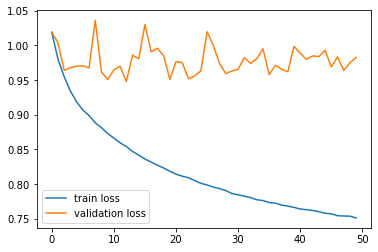

In [96]:
p.drawLossChange(train_losses, val_losses)

In [102]:
model = torch.load('./savedModels_rightOrder/stock3_LSTM_40_10')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.5165    0.3535    0.4197      4255
           1     0.8243    0.9191    0.8691     20603
           2     0.5052    0.3619    0.4217      3620

    accuracy                         0.7637     28478
   macro avg     0.6153    0.5448    0.5702     28478
weighted avg     0.7377    0.7637    0.7451     28478



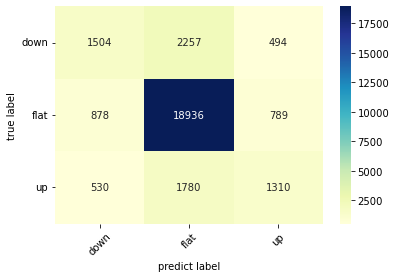

In [103]:
p.seeConfusionMatrix(all_targets,all_predictions)


# C3L

## 首先读入数据集并处理

In [4]:
# 设置使用多少时间步的历史数据
T = 100
# 选择股票数据：共0、1、2、3、4这5种股票
stockIndex = 1
# 数据路径
train7path = f'../../data/processed/stock{stockIndex}/final_train7_part{stockIndex}.csv'
test7path = f'../../data/processed/stock{stockIndex}/final_test7_part{stockIndex}.csv'
test8path = f'../../data/processed/stock{stockIndex}/final_test8_part{stockIndex}.csv'
test9path = f'../../data/processed/stock{stockIndex}/final_test9_part{stockIndex}.csv'
# 切分数据集
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
# 得到Pytorch中的DataLoader
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-20,num_classes=num_classes,T=T,batch_size=batch_size,num_features=40)

## 源数据集格式

In [5]:
df = pd.read_csv(train7path)
# 前40列是用于测试的特征 144-148列对应5种预测范围下的预测标签y
# 最后2列是论文中提到的新增的2个特征VOI和OIR，其余列是辅助列，并未在模型中使用
# 前40列分别表示ask1、ask1_volume、bid1、bid1_volume。。。以此类推
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,By20,By25,By30,OI,OIR,spread,OIspread,OIRspread,OIstd,OIRstd
0,0.1259,0.02007,0.1258,0.00300,0.1260,0.01661,0.1257,0.03166,0.1261,0.04519,...,3,3,3,0.00000,-0.739922,0.0001,0.0,-7399.219766,-0.002758,-2.026649
1,0.1259,0.02007,0.1258,0.01271,0.1260,0.01661,0.1257,0.02966,0.1261,0.06057,...,3,3,3,0.00971,-0.224527,0.0001,97.1,-2245.271507,1.477663,-0.660549
2,0.1259,0.00600,0.1258,0.02271,0.1260,0.01661,0.1257,0.02266,0.1261,0.06057,...,3,3,3,0.02407,0.582027,0.0001,240.7,5820.271682,3.667041,1.477295
3,0.1259,0.00600,0.1258,0.01271,0.1260,0.01661,0.1257,0.01476,0.1261,0.06057,...,3,3,3,-0.01000,0.358632,0.0001,-100.0,3586.317477,-1.527394,0.885165
4,0.1259,0.00200,0.1258,0.02271,0.1261,0.06057,0.1257,0.01476,0.1262,0.03042,...,3,3,3,0.01400,0.838122,0.0001,140.0,8381.222177,2.131732,2.156098


In [7]:
# 1，2，3分别代表下降、不变、上升
df[['144','145','146','147','148']]

,144,145,146,147,148
0,2.0,2.0,2.0,1.0,1.0
1,2.0,2.0,2.0,1.0,1.0
2,2.0,2.0,2.0,2.0,1.0
3,2.0,2.0,2.0,2.0,1.0
4,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...
50945,1.0,1.0,1.0,1.0,1.0
50946,1.0,1.0,1.0,1.0,1.0
50947,3.0,3.0,1.0,1.0,1.0
50948,3.0,3.0,3.0,1.0,1.0


## 数据集切分

In [8]:
print(dec_train.shape,dec_val.shape,dec_test.shape)

(40760, 168) (10190, 168) (28577, 168)


## 经过处理后得到的DataLoader内容

In [9]:
for x,y in train_loader:
    print(x.shape) # shape：[batchsize,channels,timesteps,features]
    print(y.shape) # shape: [batchsize]
    print(x)
    print(y)
    break

torch.Size([64, 1, 100, 40])
torch.Size([64])
tensor([[[[0.1762, 0.0124, 0.1760,  ..., 0.0100, 0.1750, 0.0083],
          [0.1762, 0.0124, 0.1760,  ..., 0.0100, 0.1750, 0.0083],
          [0.1762, 0.0124, 0.1760,  ..., 0.0100, 0.1750, 0.0083],
          ...,
          [0.1759, 0.0200, 0.1756,  ..., 0.0193, 0.1744, 0.0388],
          [0.1759, 0.0170, 0.1756,  ..., 0.0193, 0.1744, 0.0388],
          [0.1759, 0.0170, 0.1756,  ..., 0.0193, 0.1744, 0.0388]]],


        [[[0.1707, 0.0336, 0.1706,  ..., 0.0010, 0.1697, 0.0100],
          [0.1707, 0.0336, 0.1706,  ..., 0.0010, 0.1697, 0.0100],
          [0.1707, 0.0436, 0.1706,  ..., 0.0010, 0.1697, 0.0100],
          ...,
          [0.1704, 0.0020, 0.1702,  ..., 0.0100, 0.1690, 0.0028],
          [0.1704, 0.0020, 0.1702,  ..., 0.0100, 0.1690, 0.0028],
          [0.1704, 0.0020, 0.1702,  ..., 0.0100, 0.1690, 0.0028]]],


        [[[0.1250, 0.0750, 0.1248,  ..., 0.0415, 0.1239, 0.1431],
          [0.1250, 0.0750, 0.1249,  ..., 0.0415, 0.1240, 0

## 展示模型结构

In [10]:
model = my.C3L(y_len=3, device = device)
model.to(device)

C3L(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1,

## 展示数据从输入到输出的shape变化

In [12]:
summary(model, (64, 1, 100, 40))

Layer (type:depth-idx)                   Output Shape              Param #
C3L                                      --                        --
├─Sequential: 1-1                        [64, 32, 94, 20]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 20]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 20]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 20]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 20]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 20]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 20]          64
│    └─Conv2d: 2-7                       [64, 32, 94, 20]          4,128
│    └─LeakyReLU: 2-8                    [64, 32, 94, 20]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 94, 20]          64
├─Sequential: 1-2                        [64, 32, 88, 10]          --
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          2,080
│    └

## 可视化训练过程（耗时较长，所以使用此notebook记录运行结果）

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName=f'./savedModels_rightOrder/stock{stockIndex}_C3L_40_30')

  2%|▏         | 1/50 [00:10<08:36, 10.54s/it]

model saved
Epoch 1/50, Train Loss: 0.9754,           Validation Loss: 0.9316, Duration: 0:00:10.534744, Best Val Epoch: 0


  4%|▍         | 2/50 [00:20<08:18, 10.40s/it]

model saved
Epoch 2/50, Train Loss: 0.8539,           Validation Loss: 0.8648, Duration: 0:00:10.295859, Best Val Epoch: 1


  6%|▌         | 3/50 [00:30<07:57, 10.16s/it]

model saved
Epoch 3/50, Train Loss: 0.8037,           Validation Loss: 0.8512, Duration: 0:00:09.888901, Best Val Epoch: 2


  8%|▊         | 4/50 [00:40<07:48, 10.19s/it]

model saved
Epoch 4/50, Train Loss: 0.7778,           Validation Loss: 0.8427, Duration: 0:00:10.228502, Best Val Epoch: 3


 10%|█         | 5/50 [00:51<07:37, 10.17s/it]

model saved
Epoch 5/50, Train Loss: 0.7590,           Validation Loss: 0.8363, Duration: 0:00:10.139561, Best Val Epoch: 4


 12%|█▏        | 6/50 [01:02<07:42, 10.51s/it]

Epoch 6/50, Train Loss: 0.7493,           Validation Loss: 0.8408, Duration: 0:00:11.157716, Best Val Epoch: 4


 14%|█▍        | 7/50 [01:13<07:48, 10.90s/it]

model saved
Epoch 7/50, Train Loss: 0.7359,           Validation Loss: 0.8363, Duration: 0:00:11.709843, Best Val Epoch: 6


 16%|█▌        | 8/50 [01:24<07:32, 10.77s/it]

model saved
Epoch 8/50, Train Loss: 0.7273,           Validation Loss: 0.8310, Duration: 0:00:10.480042, Best Val Epoch: 7


 18%|█▊        | 9/50 [01:34<07:16, 10.64s/it]

Epoch 9/50, Train Loss: 0.7191,           Validation Loss: 0.8390, Duration: 0:00:10.342582, Best Val Epoch: 7


 20%|██        | 10/50 [01:44<06:58, 10.47s/it]

Epoch 10/50, Train Loss: 0.7117,           Validation Loss: 0.8340, Duration: 0:00:10.099547, Best Val Epoch: 7


 22%|██▏       | 11/50 [01:56<06:58, 10.73s/it]

Epoch 11/50, Train Loss: 0.7070,           Validation Loss: 0.8359, Duration: 0:00:11.304100, Best Val Epoch: 7


 24%|██▍       | 12/50 [02:07<06:49, 10.78s/it]

Epoch 12/50, Train Loss: 0.7003,           Validation Loss: 0.8312, Duration: 0:00:10.902399, Best Val Epoch: 7


 26%|██▌       | 13/50 [02:18<06:45, 10.97s/it]

Epoch 13/50, Train Loss: 0.6935,           Validation Loss: 0.8420, Duration: 0:00:11.409171, Best Val Epoch: 7


 28%|██▊       | 14/50 [02:29<06:34, 10.96s/it]

Epoch 14/50, Train Loss: 0.6897,           Validation Loss: 0.8380, Duration: 0:00:10.930063, Best Val Epoch: 7


 30%|███       | 15/50 [02:39<06:18, 10.83s/it]

Epoch 15/50, Train Loss: 0.6875,           Validation Loss: 0.8381, Duration: 0:00:10.524900, Best Val Epoch: 7


 32%|███▏      | 16/50 [02:50<06:04, 10.71s/it]

Epoch 16/50, Train Loss: 0.6818,           Validation Loss: 0.8365, Duration: 0:00:10.423362, Best Val Epoch: 7


 34%|███▍      | 17/50 [03:01<05:53, 10.73s/it]

model saved
Epoch 17/50, Train Loss: 0.6784,           Validation Loss: 0.8292, Duration: 0:00:10.771283, Best Val Epoch: 16


 36%|███▌      | 18/50 [03:11<05:42, 10.69s/it]

Epoch 18/50, Train Loss: 0.6767,           Validation Loss: 0.8370, Duration: 0:00:10.614303, Best Val Epoch: 16


 38%|███▊      | 19/50 [03:21<05:27, 10.55s/it]

Epoch 19/50, Train Loss: 0.6719,           Validation Loss: 0.8330, Duration: 0:00:10.219959, Best Val Epoch: 16


 40%|████      | 20/50 [03:32<05:11, 10.40s/it]

Epoch 20/50, Train Loss: 0.6720,           Validation Loss: 0.8405, Duration: 0:00:10.037542, Best Val Epoch: 16


 42%|████▏     | 21/50 [03:42<05:00, 10.36s/it]

Epoch 21/50, Train Loss: 0.6676,           Validation Loss: 0.8349, Duration: 0:00:10.261929, Best Val Epoch: 16


 44%|████▍     | 22/50 [03:52<04:48, 10.32s/it]

Epoch 22/50, Train Loss: 0.6642,           Validation Loss: 0.8401, Duration: 0:00:10.221290, Best Val Epoch: 16


 46%|████▌     | 23/50 [04:04<04:52, 10.84s/it]

model saved
Epoch 23/50, Train Loss: 0.6613,           Validation Loss: 0.8257, Duration: 0:00:12.056440, Best Val Epoch: 22


 48%|████▊     | 24/50 [04:15<04:39, 10.75s/it]

Epoch 24/50, Train Loss: 0.6585,           Validation Loss: 0.8323, Duration: 0:00:10.541076, Best Val Epoch: 22


 50%|█████     | 25/50 [04:27<04:39, 11.17s/it]

Epoch 25/50, Train Loss: 0.6576,           Validation Loss: 0.8336, Duration: 0:00:12.160373, Best Val Epoch: 22


 52%|█████▏    | 26/50 [04:38<04:30, 11.26s/it]

Epoch 26/50, Train Loss: 0.6537,           Validation Loss: 0.8395, Duration: 0:00:11.471378, Best Val Epoch: 22


 54%|█████▍    | 27/50 [04:50<04:22, 11.40s/it]

Epoch 27/50, Train Loss: 0.6546,           Validation Loss: 0.8272, Duration: 0:00:11.730688, Best Val Epoch: 22


 56%|█████▌    | 28/50 [05:01<04:08, 11.30s/it]

Epoch 28/50, Train Loss: 0.6496,           Validation Loss: 0.8270, Duration: 0:00:11.058362, Best Val Epoch: 22


 58%|█████▊    | 29/50 [05:12<03:53, 11.10s/it]

model saved
Epoch 29/50, Train Loss: 0.6480,           Validation Loss: 0.8240, Duration: 0:00:10.621406, Best Val Epoch: 28


 60%|██████    | 30/50 [05:22<03:39, 10.98s/it]

Epoch 30/50, Train Loss: 0.6480,           Validation Loss: 0.8278, Duration: 0:00:10.713308, Best Val Epoch: 28


 62%|██████▏   | 31/50 [05:33<03:27, 10.91s/it]

Epoch 31/50, Train Loss: 0.6479,           Validation Loss: 0.8337, Duration: 0:00:10.735568, Best Val Epoch: 28


 64%|██████▍   | 32/50 [05:44<03:14, 10.80s/it]

Epoch 32/50, Train Loss: 0.6453,           Validation Loss: 0.8299, Duration: 0:00:10.540319, Best Val Epoch: 28


 66%|██████▌   | 33/50 [05:54<03:00, 10.62s/it]

Epoch 33/50, Train Loss: 0.6425,           Validation Loss: 0.8351, Duration: 0:00:10.198529, Best Val Epoch: 28


 68%|██████▊   | 34/50 [06:04<02:49, 10.58s/it]

model saved
Epoch 34/50, Train Loss: 0.6409,           Validation Loss: 0.8194, Duration: 0:00:10.494219, Best Val Epoch: 33


 70%|███████   | 35/50 [06:15<02:39, 10.61s/it]

Epoch 35/50, Train Loss: 0.6391,           Validation Loss: 0.8301, Duration: 0:00:10.671132, Best Val Epoch: 33


 72%|███████▏  | 36/50 [06:26<02:29, 10.70s/it]

Epoch 36/50, Train Loss: 0.6383,           Validation Loss: 0.8378, Duration: 0:00:10.910539, Best Val Epoch: 33


 74%|███████▍  | 37/50 [06:37<02:19, 10.74s/it]

Epoch 37/50, Train Loss: 0.6380,           Validation Loss: 0.8209, Duration: 0:00:10.836250, Best Val Epoch: 33


 76%|███████▌  | 38/50 [06:47<02:08, 10.71s/it]

Epoch 38/50, Train Loss: 0.6372,           Validation Loss: 0.8394, Duration: 0:00:10.635722, Best Val Epoch: 33


 78%|███████▊  | 39/50 [06:58<01:58, 10.73s/it]

Epoch 39/50, Train Loss: 0.6375,           Validation Loss: 0.8321, Duration: 0:00:10.772490, Best Val Epoch: 33


 80%|████████  | 40/50 [07:09<01:47, 10.74s/it]

Epoch 40/50, Train Loss: 0.6339,           Validation Loss: 0.8317, Duration: 0:00:10.777293, Best Val Epoch: 33


 82%|████████▏ | 41/50 [07:19<01:35, 10.56s/it]

Epoch 41/50, Train Loss: 0.6338,           Validation Loss: 0.8299, Duration: 0:00:10.129116, Best Val Epoch: 33


 84%|████████▍ | 42/50 [07:29<01:23, 10.41s/it]

Epoch 42/50, Train Loss: 0.6333,           Validation Loss: 0.8256, Duration: 0:00:10.068684, Best Val Epoch: 33


 86%|████████▌ | 43/50 [07:40<01:13, 10.51s/it]

Epoch 43/50, Train Loss: 0.6334,           Validation Loss: 0.8303, Duration: 0:00:10.734732, Best Val Epoch: 33


 88%|████████▊ | 44/50 [07:50<01:03, 10.53s/it]

Epoch 44/50, Train Loss: 0.6307,           Validation Loss: 0.8322, Duration: 0:00:10.573712, Best Val Epoch: 33


 90%|█████████ | 45/50 [08:01<00:52, 10.42s/it]

Epoch 45/50, Train Loss: 0.6303,           Validation Loss: 0.8199, Duration: 0:00:10.165533, Best Val Epoch: 33


 92%|█████████▏| 46/50 [08:11<00:41, 10.37s/it]

Epoch 46/50, Train Loss: 0.6282,           Validation Loss: 0.8372, Duration: 0:00:10.266093, Best Val Epoch: 33


 94%|█████████▍| 47/50 [08:21<00:31, 10.38s/it]

Epoch 47/50, Train Loss: 0.6304,           Validation Loss: 0.8195, Duration: 0:00:10.378511, Best Val Epoch: 33


 96%|█████████▌| 48/50 [08:32<00:20, 10.42s/it]

Epoch 48/50, Train Loss: 0.6299,           Validation Loss: 0.8305, Duration: 0:00:10.531883, Best Val Epoch: 33


 98%|█████████▊| 49/50 [08:43<00:10, 10.70s/it]

Epoch 49/50, Train Loss: 0.6270,           Validation Loss: 0.8245, Duration: 0:00:11.346602, Best Val Epoch: 33


100%|██████████| 50/50 [08:55<00:00, 10.72s/it]

Epoch 50/50, Train Loss: 0.6262,           Validation Loss: 0.8302, Duration: 0:00:12.247559, Best Val Epoch: 33


## 可视化训练集和验证集上的loss下降过程

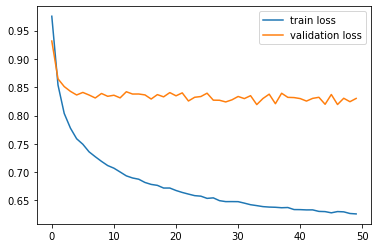

In [16]:
p.drawLossChange(train_losses, val_losses)

## 加载训练好的模型并应用到测试集

In [17]:
model = torch.load(f'./savedModels_rightOrder/stock{stockIndex}_C3L_40_30')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.6760    0.7631    0.7169     10973
           1     0.7188    0.5664    0.6335      8113
           2     0.6608    0.6823    0.6714      9392

    accuracy                         0.6804     28478
   macro avg     0.6852    0.6706    0.6739     28478
weighted avg     0.6832    0.6804    0.6781     28478



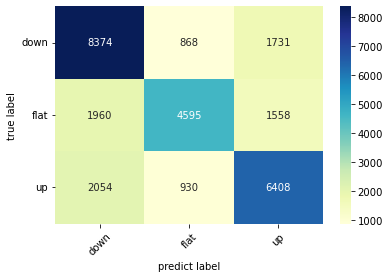

In [18]:
p.seeConfusionMatrix(all_targets,all_predictions)

# VOI,OIR的有效性初步测试

In [19]:
stockIndex = 1
train7path = f'../../data/processed/stock{stockIndex}/final_train7_part{stockIndex}.csv'
test7path = f'.../../data/processed/stock{stockIndex}/final_test7_part{stockIndex}.csv'
test8path = f'../../data/processed/stock{stockIndex}/final_test8_part{stockIndex}.csv'
test9path = f'../../data/processed/stock{stockIndex}/final_test9_part{stockIndex}.csv'
df = pd.read_csv(train7path)

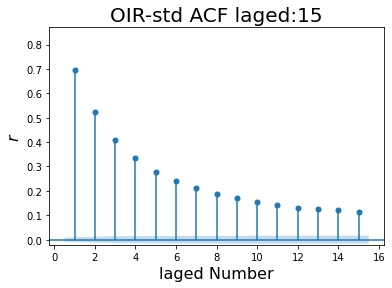

In [23]:
##ACF function for the OIR-ResampledData
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots()
OIRstd = np.array(df['OIRstd'])
plot_acf(OIRstd, ax=axes, lags = np.arange(1,16), auto_ylims=True)
axes.set_title("OIR-std ACF laged:15",fontsize=20)
axes.set_xlabel("laged Number", fontsize=16)
axes.set_ylabel("$r$", fontsize=16)
plt.show()

In [26]:
# 相关性测试
y = np.array(df['By30'])
VOIstd = np.array(df['OIstd'])
OIRstd = np.array(df['OIRstd'])

my_rho = np.corrcoef(OIRstd, y)
print(my_rho)

[[1.         0.16124587]
 [0.16124587 1.        ]]


# C3L 42

In [13]:
T = 100
train7path = '../../data/random_processed/stock0/final_train7_part0.csv'
test7path = '../../data/random_processed/stock0/final_test7_part0.csv'
test8path = '../../data/random_processed/stock0/final_test8_part0.csv'
test9path = '../../data/random_processed/stock0/final_test9_part0.csv'
dec_train, dec_val, dec_test = prepare.splitDataset(0.8,0.8,train7path,test7path,test8path,test9path)
train_loader, val_loader, test_loader = prepare.getDataLoader(dec_train,dec_val,dec_test,k=-17,num_classes=num_classes,T=T,batch_size=batch_size, num_features=42)

In [6]:
model = my.deeplob(y_len=3, device = device)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [7]:
summary(model, (64, 1, 100, 42))

Layer (type:depth-idx)                   Output Shape              Param #
deeplob                                  --                        --
├─Sequential: 1-1                        [64, 32, 94, 21]          --
│    └─Conv2d: 2-1                       [64, 32, 100, 21]         96
│    └─LeakyReLU: 2-2                    [64, 32, 100, 21]         --
│    └─BatchNorm2d: 2-3                  [64, 32, 100, 21]         64
│    └─Conv2d: 2-4                       [64, 32, 97, 21]          4,128
│    └─LeakyReLU: 2-5                    [64, 32, 97, 21]          --
│    └─BatchNorm2d: 2-6                  [64, 32, 97, 21]          64
│    └─Conv2d: 2-7                       [64, 32, 94, 21]          4,128
│    └─LeakyReLU: 2-8                    [64, 32, 94, 21]          --
│    └─BatchNorm2d: 2-9                  [64, 32, 94, 21]          64
├─Sequential: 1-2                        [64, 32, 88, 10]          --
│    └─Conv2d: 2-10                      [64, 32, 94, 10]          2,080
│    └

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_losses, val_losses = train.batch_gd(model, criterion, optimizer, train_loader, val_loader, epochs=50, device=device, savedModelName='./savedModels_randomOrder/stock0_deeplob_42_Ay10')

  2%|▏         | 1/50 [00:11<09:23, 11.51s/it]

model saved
Epoch 1/50, Train Loss: 0.8829,           Validation Loss: 0.8766, Duration: 0:00:11.509290, Best Val Epoch: 0


  4%|▍         | 2/50 [00:21<08:43, 10.90s/it]

model saved
Epoch 2/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:10.479935, Best Val Epoch: 1


  6%|▌         | 3/50 [00:33<08:53, 11.35s/it]

model saved
Epoch 3/50, Train Loss: 0.8830,           Validation Loss: 0.8766, Duration: 0:00:11.869780, Best Val Epoch: 2


  8%|▊         | 4/50 [00:44<08:32, 11.13s/it]

Epoch 4/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:10.803630, Best Val Epoch: 2


 10%|█         | 5/50 [00:55<08:10, 10.91s/it]

Epoch 5/50, Train Loss: 0.8826,           Validation Loss: 0.8766, Duration: 0:00:10.510241, Best Val Epoch: 2


 12%|█▏        | 6/50 [01:05<07:57, 10.86s/it]

Epoch 6/50, Train Loss: 0.8832,           Validation Loss: 0.8767, Duration: 0:00:10.764293, Best Val Epoch: 2


 14%|█▍        | 7/50 [01:16<07:46, 10.84s/it]

Epoch 7/50, Train Loss: 0.8831,           Validation Loss: 0.8766, Duration: 0:00:10.807158, Best Val Epoch: 2


 16%|█▌        | 8/50 [01:27<07:40, 10.95s/it]

Epoch 8/50, Train Loss: 0.8827,           Validation Loss: 0.8766, Duration: 0:00:11.187555, Best Val Epoch: 2


 18%|█▊        | 9/50 [01:38<07:24, 10.85s/it]

Epoch 9/50, Train Loss: 0.8827,           Validation Loss: 0.8766, Duration: 0:00:10.608763, Best Val Epoch: 2


 20%|██        | 10/50 [01:49<07:15, 10.88s/it]

Epoch 10/50, Train Loss: 0.8826,           Validation Loss: 0.8766, Duration: 0:00:10.950590, Best Val Epoch: 2


 22%|██▏       | 11/50 [02:00<07:06, 10.95s/it]

Epoch 11/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:11.104810, Best Val Epoch: 2


 24%|██▍       | 12/50 [02:11<06:56, 10.97s/it]

Epoch 12/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:11.003942, Best Val Epoch: 2


 26%|██▌       | 13/50 [02:22<06:47, 11.01s/it]

Epoch 13/50, Train Loss: 0.8826,           Validation Loss: 0.8766, Duration: 0:00:11.117792, Best Val Epoch: 2


 28%|██▊       | 14/50 [02:33<06:31, 10.87s/it]

Epoch 14/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:10.553543, Best Val Epoch: 2


 30%|███       | 15/50 [02:44<06:20, 10.87s/it]

Epoch 15/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:10.844629, Best Val Epoch: 2


 32%|███▏      | 16/50 [02:55<06:11, 10.94s/it]

Epoch 16/50, Train Loss: 0.8828,           Validation Loss: 0.8766, Duration: 0:00:11.113494, Best Val Epoch: 2


 34%|███▍      | 17/50 [03:05<05:58, 10.87s/it]

Epoch 17/50, Train Loss: 0.8827,           Validation Loss: 0.8766, Duration: 0:00:10.714213, Best Val Epoch: 2


 36%|███▌      | 18/50 [03:16<05:46, 10.84s/it]

model saved
Epoch 18/50, Train Loss: 0.8810,           Validation Loss: 0.8482, Duration: 0:00:10.750431, Best Val Epoch: 17


 38%|███▊      | 19/50 [03:27<05:33, 10.76s/it]

model saved
Epoch 19/50, Train Loss: 0.7753,           Validation Loss: 0.7573, Duration: 0:00:10.588362, Best Val Epoch: 18


 40%|████      | 20/50 [03:37<05:21, 10.73s/it]

model saved
Epoch 20/50, Train Loss: 0.7667,           Validation Loss: 0.7506, Duration: 0:00:10.664076, Best Val Epoch: 19


 42%|████▏     | 21/50 [03:48<05:12, 10.78s/it]

model saved
Epoch 21/50, Train Loss: 0.7203,           Validation Loss: 0.7029, Duration: 0:00:10.874782, Best Val Epoch: 20


 44%|████▍     | 22/50 [03:59<05:02, 10.82s/it]

model saved
Epoch 22/50, Train Loss: 0.7159,           Validation Loss: 0.7029, Duration: 0:00:10.918936, Best Val Epoch: 21


 46%|████▌     | 23/50 [04:10<04:53, 10.86s/it]

model saved
Epoch 23/50, Train Loss: 0.7146,           Validation Loss: 0.7028, Duration: 0:00:10.939656, Best Val Epoch: 22


 48%|████▊     | 24/50 [04:21<04:41, 10.83s/it]

model saved
Epoch 24/50, Train Loss: 0.7145,           Validation Loss: 0.7028, Duration: 0:00:10.767748, Best Val Epoch: 23


 50%|█████     | 25/50 [04:32<04:31, 10.86s/it]

Epoch 25/50, Train Loss: 0.7152,           Validation Loss: 0.7068, Duration: 0:00:10.930306, Best Val Epoch: 23


 52%|█████▏    | 26/50 [04:43<04:19, 10.79s/it]

model saved
Epoch 26/50, Train Loss: 0.7150,           Validation Loss: 0.7028, Duration: 0:00:10.637147, Best Val Epoch: 25


 54%|█████▍    | 27/50 [04:54<04:09, 10.85s/it]

model saved
Epoch 27/50, Train Loss: 0.7150,           Validation Loss: 0.7028, Duration: 0:00:10.973110, Best Val Epoch: 26


 56%|█████▌    | 28/50 [05:05<04:00, 10.91s/it]

model saved
Epoch 28/50, Train Loss: 0.7147,           Validation Loss: 0.7028, Duration: 0:00:11.052565, Best Val Epoch: 27


 58%|█████▊    | 29/50 [05:16<03:49, 10.92s/it]

model saved
Epoch 29/50, Train Loss: 0.7147,           Validation Loss: 0.7028, Duration: 0:00:10.952120, Best Val Epoch: 28


 60%|██████    | 30/50 [05:26<03:38, 10.92s/it]

model saved
Epoch 30/50, Train Loss: 0.7146,           Validation Loss: 0.7028, Duration: 0:00:10.925199, Best Val Epoch: 29


 62%|██████▏   | 31/50 [05:37<03:24, 10.78s/it]

model saved
Epoch 31/50, Train Loss: 0.7147,           Validation Loss: 0.7027, Duration: 0:00:10.432324, Best Val Epoch: 30


 64%|██████▍   | 32/50 [05:47<03:09, 10.53s/it]

Epoch 32/50, Train Loss: 0.7163,           Validation Loss: 0.7028, Duration: 0:00:09.957037, Best Val Epoch: 30


 66%|██████▌   | 33/50 [05:57<02:57, 10.44s/it]

model saved
Epoch 33/50, Train Loss: 0.7148,           Validation Loss: 0.7027, Duration: 0:00:10.229987, Best Val Epoch: 32


 68%|██████▊   | 34/50 [06:09<02:53, 10.84s/it]

Epoch 34/50, Train Loss: 0.7145,           Validation Loss: 0.7027, Duration: 0:00:11.767246, Best Val Epoch: 32


 70%|███████   | 35/50 [06:20<02:43, 10.93s/it]

model saved
Epoch 35/50, Train Loss: 0.7145,           Validation Loss: 0.7027, Duration: 0:00:11.149881, Best Val Epoch: 34


 72%|███████▏  | 36/50 [06:31<02:31, 10.85s/it]

model saved
Epoch 36/50, Train Loss: 0.7146,           Validation Loss: 0.7027, Duration: 0:00:10.671139, Best Val Epoch: 35


 74%|███████▍  | 37/50 [06:41<02:19, 10.72s/it]

model saved
Epoch 37/50, Train Loss: 0.7147,           Validation Loss: 0.7027, Duration: 0:00:10.397394, Best Val Epoch: 36


 76%|███████▌  | 38/50 [06:52<02:07, 10.66s/it]

model saved
Epoch 38/50, Train Loss: 0.7146,           Validation Loss: 0.7027, Duration: 0:00:10.533101, Best Val Epoch: 37


 78%|███████▊  | 39/50 [07:03<01:58, 10.75s/it]

model saved
Epoch 39/50, Train Loss: 0.7146,           Validation Loss: 0.7027, Duration: 0:00:10.968391, Best Val Epoch: 38


 80%|████████  | 40/50 [07:14<01:48, 10.83s/it]

model saved
Epoch 40/50, Train Loss: 0.7146,           Validation Loss: 0.7027, Duration: 0:00:11.014067, Best Val Epoch: 39


 82%|████████▏ | 41/50 [07:24<01:37, 10.78s/it]

model saved
Epoch 41/50, Train Loss: 0.7146,           Validation Loss: 0.7027, Duration: 0:00:10.652053, Best Val Epoch: 40


 84%|████████▍ | 42/50 [07:35<01:26, 10.80s/it]

model saved
Epoch 42/50, Train Loss: 0.7148,           Validation Loss: 0.7027, Duration: 0:00:10.854434, Best Val Epoch: 41


 86%|████████▌ | 43/50 [07:46<01:16, 10.89s/it]

model saved
Epoch 43/50, Train Loss: 0.7145,           Validation Loss: 0.7027, Duration: 0:00:11.101264, Best Val Epoch: 42


 88%|████████▊ | 44/50 [07:57<01:05, 10.94s/it]

model saved
Epoch 44/50, Train Loss: 0.7147,           Validation Loss: 0.7027, Duration: 0:00:11.046295, Best Val Epoch: 43


 90%|█████████ | 45/50 [08:08<00:54, 10.99s/it]

model saved
Epoch 45/50, Train Loss: 0.7145,           Validation Loss: 0.7027, Duration: 0:00:11.107879, Best Val Epoch: 44


 92%|█████████▏| 46/50 [08:19<00:44, 11.02s/it]

model saved
Epoch 46/50, Train Loss: 0.7148,           Validation Loss: 0.7027, Duration: 0:00:11.088747, Best Val Epoch: 45


 94%|█████████▍| 47/50 [08:31<00:33, 11.07s/it]

model saved
Epoch 47/50, Train Loss: 0.7147,           Validation Loss: 0.7027, Duration: 0:00:11.174522, Best Val Epoch: 46


 96%|█████████▌| 48/50 [08:42<00:22, 11.16s/it]

Epoch 48/50, Train Loss: 0.7161,           Validation Loss: 0.7040, Duration: 0:00:11.368427, Best Val Epoch: 46


 98%|█████████▊| 49/50 [08:53<00:11, 11.10s/it]

Epoch 49/50, Train Loss: 0.7148,           Validation Loss: 0.7027, Duration: 0:00:10.949717, Best Val Epoch: 46


100%|██████████| 50/50 [09:04<00:00, 10.89s/it]

Epoch 50/50, Train Loss: 0.7149,           Validation Loss: 0.7027, Duration: 0:00:10.896906, Best Val Epoch: 46


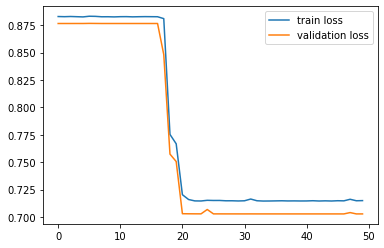

In [15]:
p.drawLossChange(train_losses, val_losses)

In [16]:
model = torch.load('./savedModels_randomOrder/stock0_deeplob_42_Ay10')
all_targets, all_predictions = p.getReport(test_loader, model, device)

              precision    recall  f1-score   support

           0     0.7957    0.9805    0.8785      9397
           1     0.8603    0.5592    0.6778      9401
           2     0.8352    0.9307    0.8803      9680

    accuracy                         0.8245     28478
   macro avg     0.8304    0.8235    0.8122     28478
weighted avg     0.8304    0.8245    0.8129     28478



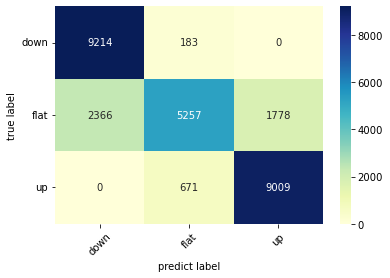

In [17]:
p.seeConfusionMatrix(all_targets,all_predictions)